# Introduction

Our project intends to find the best neighborhood in Pittsburgh. We defined “best” as quality of life, or how good it would be to live in the city. We determined this based on three core metrics, safety, entertainment, and liveability. We considered exploring more silly metrics like dog licenses but eventually landed on a more serious approach. 

# Metric

Our metric is quality of life, and the specific features we’re using are air quality, crime statistics, and the amount of playgrounds in each neighborhood. The specific datasets are the criminal activity dashboard from the past month, Allegheny County Air quality data, and every instance of a playground in Pittsburgh and its accompanying neighborhood. All data was obtained from the WPRDC.

# The Best Neighborhood:

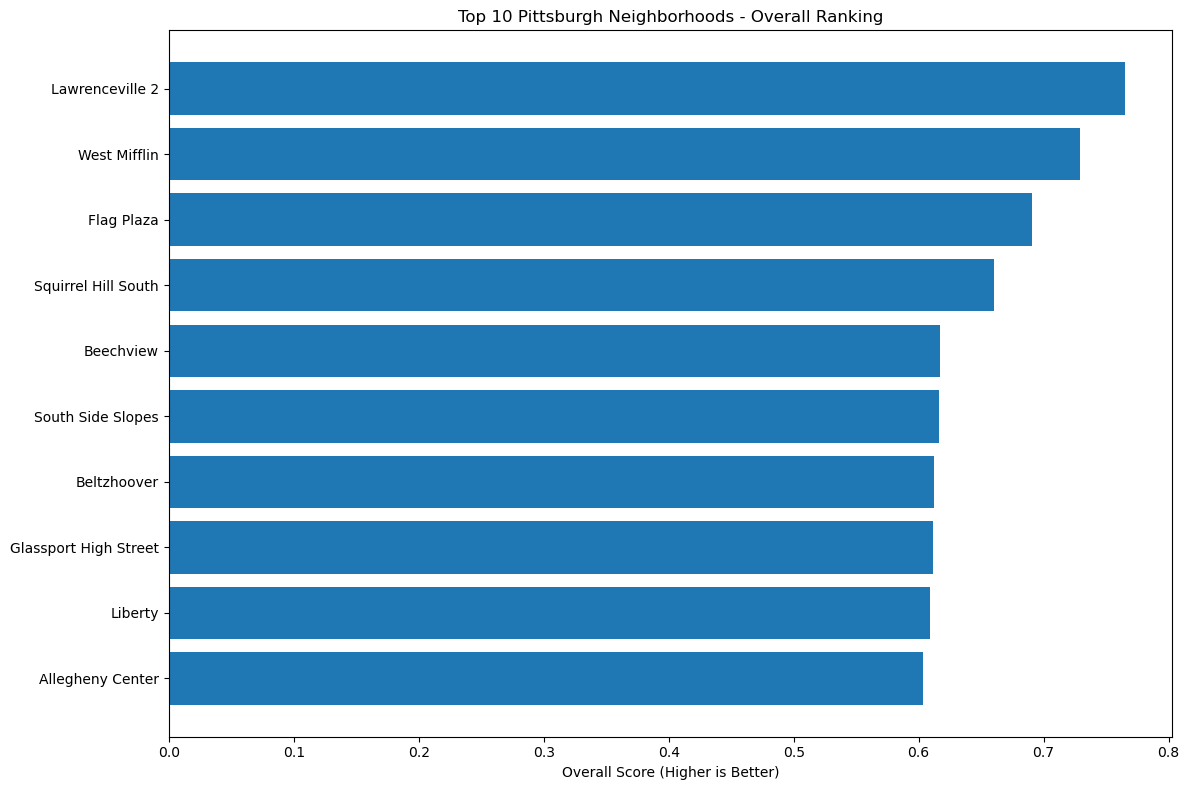


Score Breakdowns
 1. Lawrenceville 2           Overall: 0.765 | Playgrounds: 0.125 | Safety: 0.930 | Air Quality: 0.919
 2. West Mifflin              Overall: 0.729 | Playgrounds: 0.125 | Safety: 0.930 | Air Quality: 0.830
 3. Flag Plaza                Overall: 0.690 | Playgrounds: 0.125 | Safety: 0.930 | Air Quality: 0.734
 4. Squirrel Hill South       Overall: 0.660 | Playgrounds: 1.000 | Safety: 0.813 | Air Quality: 0.338
 5. Beechview                 Overall: 0.617 | Playgrounds: 0.625 | Safety: 0.892 | Air Quality: 0.338
 6. South Side Slopes         Overall: 0.616 | Playgrounds: 0.625 | Safety: 0.890 | Air Quality: 0.338
 7. Beltzhoover               Overall: 0.612 | Playgrounds: 0.500 | Safety: 0.943 | Air Quality: 0.338
 8. Glassport High Street     Overall: 0.612 | Playgrounds: 0.125 | Safety: 0.930 | Air Quality: 0.536
 9. Liberty                   Overall: 0.609 | Playgrounds: 0.125 | Safety: 0.930 | Air Quality: 0.530
10. Allegheny Center          Overall: 0.603 | Playgrou

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

crime = pd.read_csv("crime.csv", low_memory=False)
playgrounds = pd.read_csv("ground.csv")
air = pd.read_csv("airquality.csv")

# neighborhood stuff
neighborhood_rank = (
    playgrounds["neighborhood"]
    .value_counts()
    .reset_index()
)
neighborhood_rank.columns = ["Neighborhood", "Playground_Count"]

# air quality stuff
air = air.drop(columns=['health_advisory', 'health_effects'])
air = air.dropna(subset=['index_value', 'site', 'parameter'])
site_air_quality = air.groupby('site', as_index=False)['index_value'].mean()
site_air_quality['air_quality_score'] = 1 - (site_air_quality['index_value'] / site_air_quality['index_value'].max())
site_air_quality = site_air_quality.sort_values('air_quality_score', ascending=False)

# crime stuff
crime_counts = crime["Neighborhood"].value_counts().reset_index()
crime_counts.columns = ["Neighborhood", "Crime_Count"]
crime_counts["Crime_Rank"] = crime_counts["Crime_Count"].rank(ascending=False, method="dense").astype(int)
crime_counts = crime_counts.sort_values(by="Crime_Count", ascending=False).reset_index(drop=True)

# combining data
neighborhood_rank["Playground_Score"] = (neighborhood_rank["Playground_Count"] / 
                                        neighborhood_rank["Playground_Count"].max())

crime_counts["Crime_Score"] = 1 - (crime_counts["Crime_Count"] / crime_counts["Crime_Count"].max())


all_neighborhoods = set(neighborhood_rank["Neighborhood"]) | set(crime_counts["Neighborhood"]) | set(site_air_quality["site"])

master_df = pd.DataFrame({"Neighborhood": list(all_neighborhoods)})
master_df = master_df.merge(neighborhood_rank[["Neighborhood", "Playground_Score"]], 
                           on="Neighborhood", how="left")
master_df = master_df.merge(crime_counts[["Neighborhood", "Crime_Score"]], 
                           on="Neighborhood", how="left")
master_df = master_df.merge(site_air_quality[["site", "air_quality_score"]], 
                           left_on="Neighborhood", right_on="site", how="left")
master_df = master_df.drop(columns=["site"])
for col in ["Playground_Score", "Crime_Score", "air_quality_score"]:
    master_df[col] = master_df[col].fillna(master_df[col].median())
master_df["Overall_Score"] = (
    master_df["Playground_Score"] * 0.2 +  # Weight playgrounds
    master_df["Crime_Score"] * 0.4 +       # Weight safety  
    master_df["air_quality_score"] * 0.4   # Weight air quality
)
final_ranking = master_df.sort_values("Overall_Score", ascending=False).reset_index(drop=True)
final_ranking["Overall_Rank"] = range(1, len(final_ranking) + 1)
top_10 = final_ranking.head(10)[["Overall_Rank", "Neighborhood", "Overall_Score", 
                               "Playground_Score", "Crime_Score", "air_quality_score"]]
plt.figure(figsize=(12, 8))
top_10_plot = top_10.sort_values("Overall_Score", ascending=True)
plt.barh(top_10_plot["Neighborhood"], top_10_plot["Overall_Score"])
plt.xlabel('Overall Score (Higher is Better)')
plt.title('Top 10 Pittsburgh Neighborhoods - Overall Ranking')
plt.tight_layout()
plt.show()
print("\nScore Breakdowns")
print("="*80)
for _, row in top_10.iterrows():
    print(f"{row['Overall_Rank']:2d}. {row['Neighborhood']:<25} "
          f"Overall: {row['Overall_Score']:.3f} | "
          f"Playgrounds: {row['Playground_Score']:.3f} | "
          f"Safety: {row['Crime_Score']:.3f} | "
          f"Air Quality: {row['air_quality_score']:.3f}")

From our data, we think Lawrenceville is the best neighborhood in Pittsburgh. This was determined because it has some of the best air Pittsburgh has to offer, a lower crime rate than other neighborhoods, and a healthy number of parks. These factors make it a safe, liveable area where fun can be had.

# Conclusions

### Tyler
- This is surprising for me because I usually think of Liberty as my favorite neighborhood, but according to our QOL metric, Lawrenceville is the best. The data highlights factors like cleaner air and lower crime that I don’t usually consider when picking a favorite. It shows that a neighborhood that feels best to me personally isn’t always the one that scores highest in measurable quality of life.


### Arden 
-  Since I am not from Pittsburgh I am not familiar with much of the area. I have not been to Lawrenceville so I don’t have any opinions about it but it does make sense to have a high quality of life because its number of crimes was on the lower end of Pittsburgh's neighborhoods, with only 272 over the month as opposed to the neighborhoods with the most crime which had 1000-2000 crimes.

### James 
- My personal favorite neighborhood in Pittsburgh is Friendship, mainly because my sisters used to live there and I would visit them every month or so. My family is from outside of Pittsburgh, but my dad had a brief stint in Lawrenceville in his 20’s. He always described it as a nice place, and told me how he would run in Lawrenceville every day while he was in the military. Even though it wasn’t my first choice for the best neighborhood in Pittsburgh, it would be up there and I mostly agree with the data.
